# Project: Identify Customer Segments

In this project, I will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that I will use has been provided by a partners at Bertelsmann Arvato Analytics.

In [84]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline
%run utils.ipynb import *

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns


In [60]:
# Load in the general demographics data.
azdias = pd.read_csv("C:/Users/mahmo/Desktop/Identify-Customer-Segments/input/Udacity_AZDIAS_Subset.csv",delimiter=";")

# Load in the feature summary file.
feat_info = pd.read_csv("C:/Users/mahmo/Desktop/Identify-Customer-Segments/input/AZDIAS_Feature_Summary.csv",delimiter=";")

In [61]:
# Check the structure of the data after it's loaded
print("The general demographic data shape is " , azdias.shape)

The general demographic data shape is  (891221, 85)


In [62]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [63]:
azdias.tail()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
891216,-1,3,2,5.0,1,4,2,5,4,4,...,3.0,2.0,0.0,0.0,1.0,2.0,3.0,NaN,NaN,NaN
891217,-1,2,1,4.0,3,3,3,2,2,3,...,1.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,6.0,5.0
891218,-1,2,2,4.0,2,4,2,5,4,3,...,4.0,2.0,0.0,0.0,1.0,3.0,4.0,2.0,2.0,3.0
891219,-1,1,1,3.0,1,5,3,5,5,5,...,1.0,4.0,3.0,1.0,5.0,1.0,1.0,4.0,7.0,5.0
891220,-1,4,1,1.0,4,2,5,2,1,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,5.0


In [64]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [65]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGER_TYP               891221 non-null  int64  
 1   ALTERSKATEGORIE_GROB   891221 non-null  int64  
 2   ANREDE_KZ              891221 non-null  int64  
 3   CJT_GESAMTTYP          886367 non-null  float64
 4   FINANZ_MINIMALIST      891221 non-null  int64  
 5   FINANZ_SPARER          891221 non-null  int64  
 6   FINANZ_VORSORGER       891221 non-null  int64  
 7   FINANZ_ANLEGER         891221 non-null  int64  
 8   FINANZ_UNAUFFAELLIGER  891221 non-null  int64  
 9   FINANZ_HAUSBAUER       891221 non-null  int64  
 10  FINANZTYP              891221 non-null  int64  
 11  GEBURTSJAHR            891221 non-null  int64  
 12  GFK_URLAUBERTYP        886367 non-null  float64
 13  GREEN_AVANTGARDE       891221 non-null  int64  
 14  HEALTH_TYP             891221 non-nu

In [66]:
# Check the structure of the data after it's loaded
print("The feature summary data shape is " , feat_info.shape)

The feature summary data shape is  (85, 4)


In [67]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [68]:
feat_info.tail()

,attribute,information_level,type,missing_or_unknown
80,PLZ8_HHZ,macrocell_plz8,ordinal,[-1]
81,PLZ8_GBZ,macrocell_plz8,ordinal,[-1]
82,ARBEIT,community,ordinal,"[-1,9]"
83,ORTSGR_KLS9,community,ordinal,"[-1,0]"
84,RELAT_AB,community,ordinal,"[-1,9]"


In [69]:
feat_info.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,AGER_TYP,person,ordinal,[-1]
freq,1,43,49,26


In [70]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   attribute           85 non-null     object
 1   information_level   85 non-null     object
 2   type                85 non-null     object
 3   missing_or_unknown  85 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB


## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. I will use this file to help me make cleaning decisions during this stage of the project. First of all, we should assess the demographics data in terms of missing data.

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data.

In [71]:
# see what kind of missing code values
print('Unique missing values code in all columns are:', feat_info['missing_or_unknown'].unique())

Unique missing values code in all columns are: ['[-1,0]' '[-1,0,9]' '[0]' '[-1]' '[]' '[-1,9]' '[-1,X]' '[XX]' '[-1,XX]']


In [72]:
# split feat_infto into two dataframe, one of thim will enter the preprocessing, and the other doesn't need to apply
# preprocessing on int because it doesn't contain any missing values codes
feat_info1 = feat_info[feat_info['missing_or_unknown'] != '[]']
feat_info2 = feat_info[feat_info['missing_or_unknown'] == '[]']

In [73]:
# preprocess the columns of missing_or_unknown values codes to make it easy to extract information from it
feat_info1['missing_or_unknown'] = feat_info1['missing_or_unknown'].apply(lambda x: x.replace("[",""))
feat_info1['missing_or_unknown'] = feat_info1['missing_or_unknown'].apply(lambda x: x.replace("]",""))
feat_info1['missing_or_unknown'] = feat_info1['missing_or_unknown'].apply(lambda x: x.split(","))
feat_info1['missing_or_unknown'] = feat_info1['missing_or_unknown'].apply(lambda x: [t if t.isalpha() else int(t) for t in x])
feat_info = pd.concat([feat_info1, feat_info2], axis=0)
feat_info = feat_info.reset_index(drop=True)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_9272\2731157578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_info1['missing_or_unknown'] = feat_info1['missing_or_unknown'].apply(lambda x: x.replace("[",""))
C:\Users\mahmo\AppData\Local\Temp\ipykernel_9272\2731157578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_info1['missing_or_unknown'] = feat_info1['missing_or_unknown'].apply(lambda x: x.replace("]",""))
C:\Users\mahmo\AppData\Local\Temp\ipykernel_9272\2731157578.py:4: SettingWithCopyW

In [74]:
# Identify missing or unknown data values and convert them to NaNs.
missing_values_codes = []
columns = []
for column, missing_value_code in zip(feat_info["attribute"],feat_info["missing_or_unknown"]):
    missing_values_codes.extend(missing_value_code)
    columns.extend([column] * len(missing_value_code))

In [75]:
# convert missing values codes to Nans
for attribute , code in zip(columns, missing_values_codes):
    azdias[attribute] = azdias[attribute].apply(lambda x: np.NAN if x == code else x)

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing.

In [76]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
proportion_missing_values = azdias.isna().mean()
for col , proportion in zip(azdias.columns, proportion_missing_values):
    print("The proportion of values that are missing in " , col , " column is ", proportion)

The proportion of values that are missing in  AGER_TYP  column is  0.7695543529607134
The proportion of values that are missing in  ALTERSKATEGORIE_GROB  column is  0.0032326437550282143
The proportion of values that are missing in  ANREDE_KZ  column is  0.0
The proportion of values that are missing in  CJT_GESAMTTYP  column is  0.005446460529992
The proportion of values that are missing in  FINANZ_MINIMALIST  column is  0.0
The proportion of values that are missing in  FINANZ_SPARER  column is  0.0
The proportion of values that are missing in  FINANZ_VORSORGER  column is  0.0
The proportion of values that are missing in  FINANZ_ANLEGER  column is  0.0
The proportion of values that are missing in  FINANZ_UNAUFFAELLIGER  column is  0.0
The proportion of values that are missing in  FINANZ_HAUSBAUER  column is  0.0
The proportion of values that are missing in  FINANZTYP  column is  0.0
The proportion of values that are missing in  GEBURTSJAHR  column is  0.4402028228688507
The proportion 

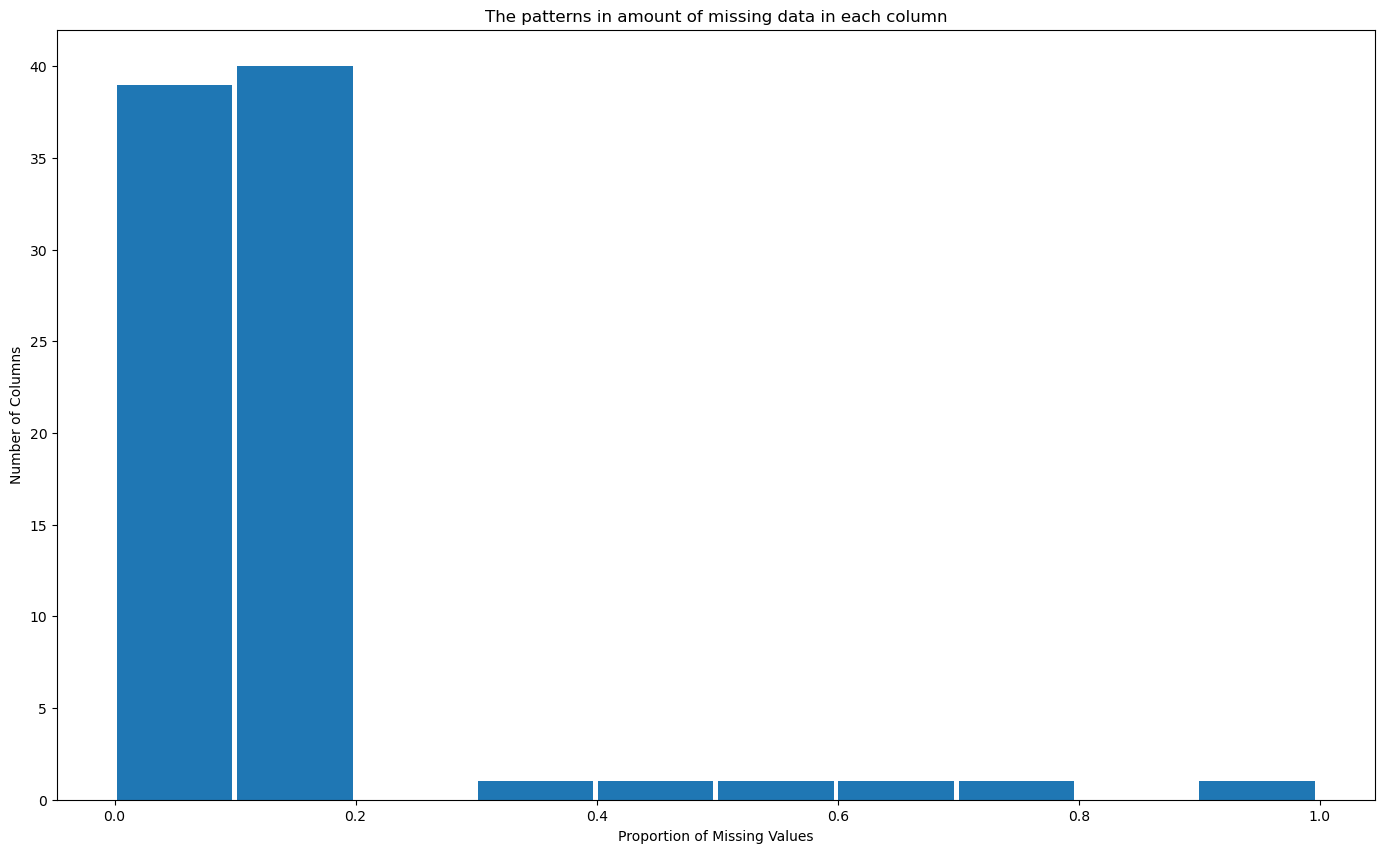

In [77]:
# Investigate patterns in the amount of missing data in each column.
plt.figure(figsize=(17,10))
plt.title("The patterns in amount of missing data in each column")
plt.hist(proportion_missing_values,rwidth=0.96)
plt.xlabel('Proportion of Missing Values')
plt.ylabel('Number of Columns')
plt.show()

Text(0.5, 0, 'Proportion of Missing Values')

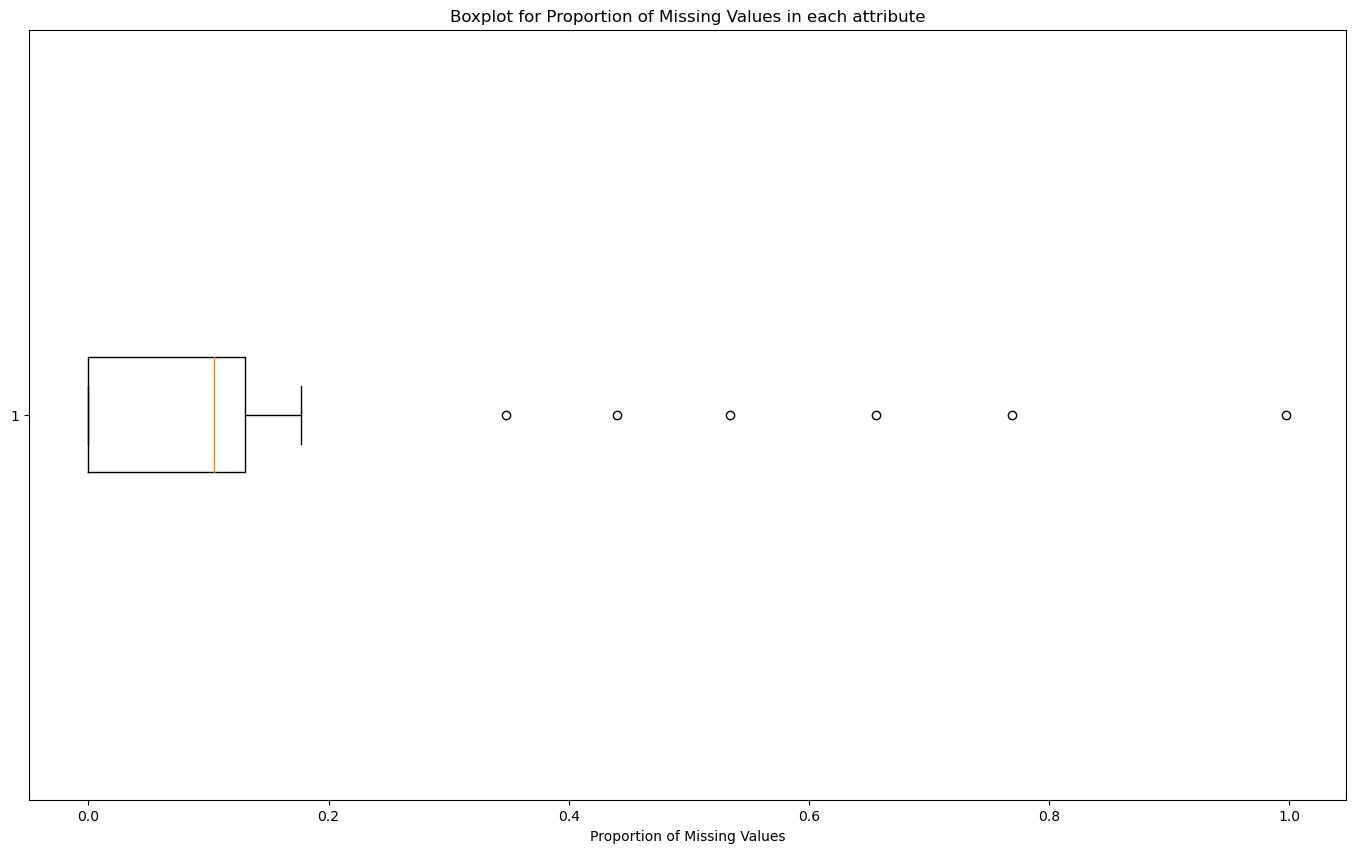

In [78]:
# Remove the outlier columns from the dataset.
plt.figure(figsize=(17,10))
plt.title("Boxplot for Proportion of Missing Values in each attribute")
plt.boxplot(proportion_missing_values,vert=False)
plt.xlabel('Proportion of Missing Values')

In [79]:
# remove outliers columns
Q1_col = np.quantile(proportion_missing_values, 0.25)
Q3_col = np.quantile(proportion_missing_values, 0.75)
IQR_col = Q3_col - Q1_col
lower_bound_col = Q1_col - (1.5 * IQR_col)
upper_bound_col = Q3_col + (1.5 * IQR_col)
removed_columns = []
for col , proportion in zip(proportion_missing_values.index , proportion_missing_values):
    if proportion >= upper_bound_col or proportion <= lower_bound_col: removed_columns.append(col)
print('Removed Columns are:', removed_columns)
azdias_dropped_columns = azdias.drop(removed_columns,axis=1)

Removed Columns are: ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']


There is a pattern in the missing values that, the majority of columns in the dataset by a percentage of **93%** are all fall in the range from **0%** to **20%** proportion of missing values in each column, and there exist a small fraction of the dataset columns that have huge numebr of missing values compared to any other columns they are **6** columns having more than **30%**  proportion of missing values in each column, we will drop these columns from our dataset.

The outliers columns that will be dropped are:
- **AGER_TYP**
- **GEBURTSJAHR**
- **TITEL_KZ**
- **ALTER_HH**
- **KK_KUNDENTYP**
- **KBA05_BAUMAX**

#### Step 1.1.3: Assess Missing Data in Each Row

How much data is missing in each row? As with the columns, we should see some groups of points that have a very different numbers of missing values. we will Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. we will Select at least five of these columns and compare the distribution of values.

Depending on what we observe in our comparison, this will have implications on how we approach our conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special.

In [80]:
# How much data is missing in each row of the dataset?
azdias_dropped_columns["NAN count"] = azdias_dropped_columns.isna().sum(axis=1)
print("The number of missing values in each row of the dataset")
print(azdias_dropped_columns["NAN count"])

The number of missing values in each row of the dataset
0         43
1          0
2          0
3          7
4          0
          ..
891216     3
891217     4
891218     5
891219     0
891220     0
Name: NAN count, Length: 891221, dtype: int64


Text(0.5, 0, 'Number of Missing Values in each row')

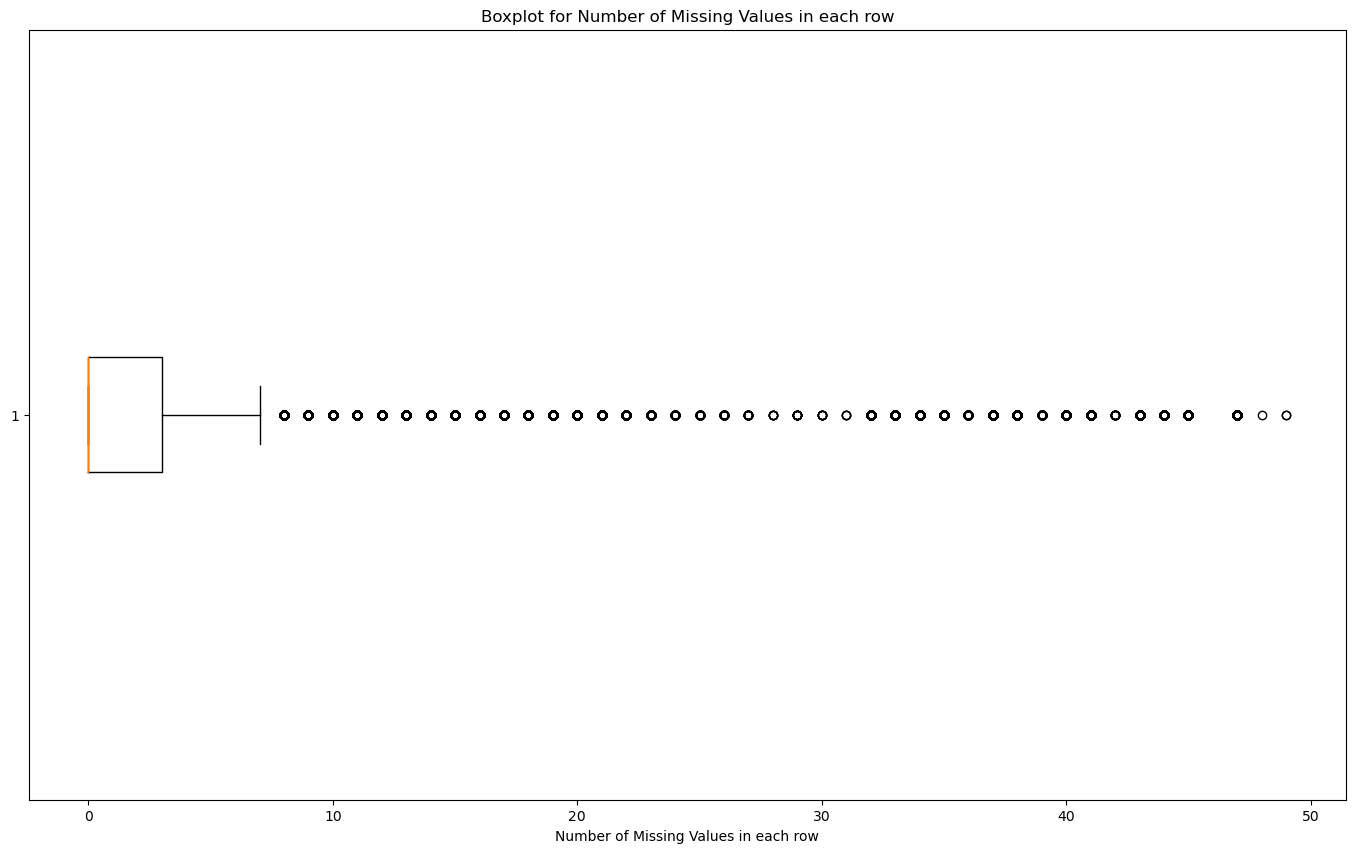

In [81]:
plt.figure(figsize=(17,10))
plt.title('Boxplot for Number of Missing Values in each row')
plt.boxplot(azdias_dropped_columns["NAN count"],vert=False)
plt.xlabel('Number of Missing Values in each row')

In [82]:
# code to divide the data into two subsets based on the number of missing
# values in each row.
Q1_row = np.quantile(azdias_dropped_columns["NAN count"], 0.25)
Q3_row = np.quantile(azdias_dropped_columns["NAN count"], 0.75)
IQR_row = Q3_row - Q1_row
upper_bound_row = np.ceil(Q3_row + (1.5 * IQR_row))
# Data with many missing values
first_subset = azdias_dropped_columns.loc[azdias_dropped_columns["NAN count"] >= upper_bound_row]
# Data with few or no missing values
second_subset = azdias_dropped_columns.loc[azdias_dropped_columns["NAN count"] < upper_bound_row]

C:\Users\mahmo\AppData\Local\Temp\ipykernel_9272\3100032343.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure , ax = plt.subplots(1,2)


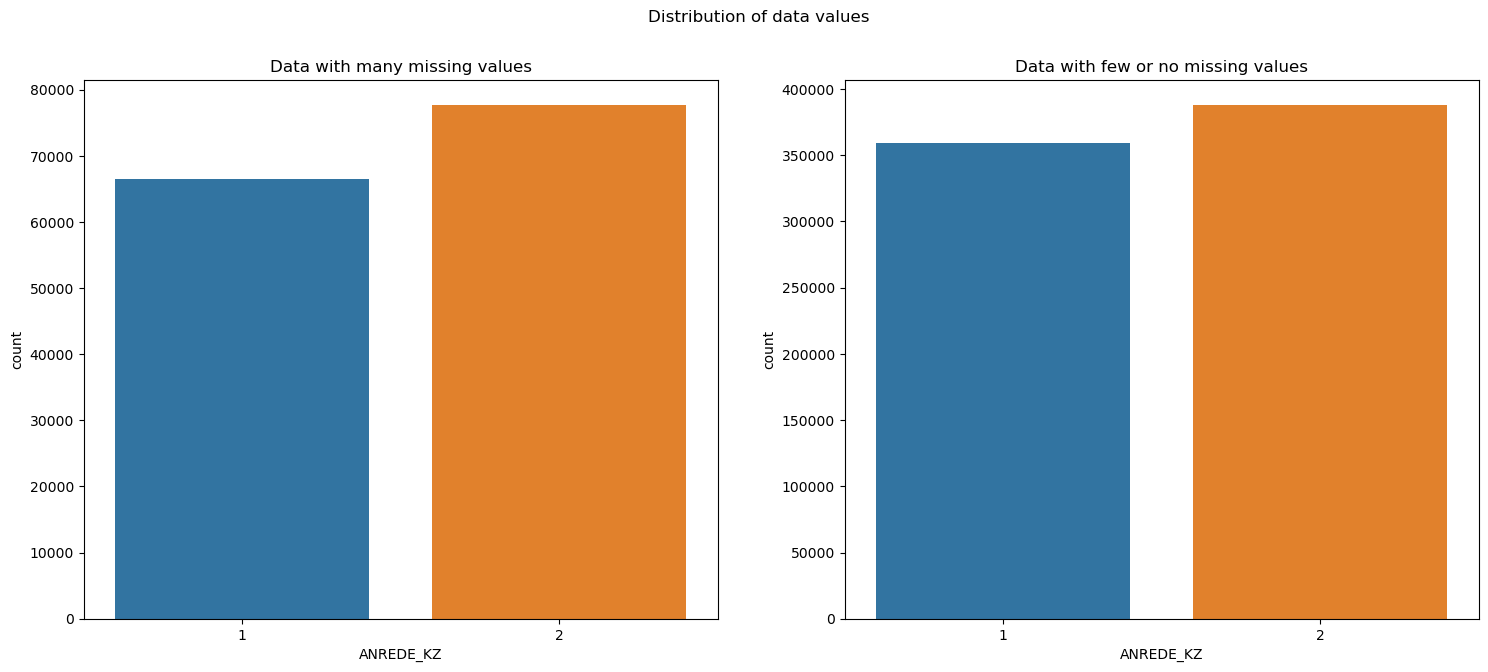

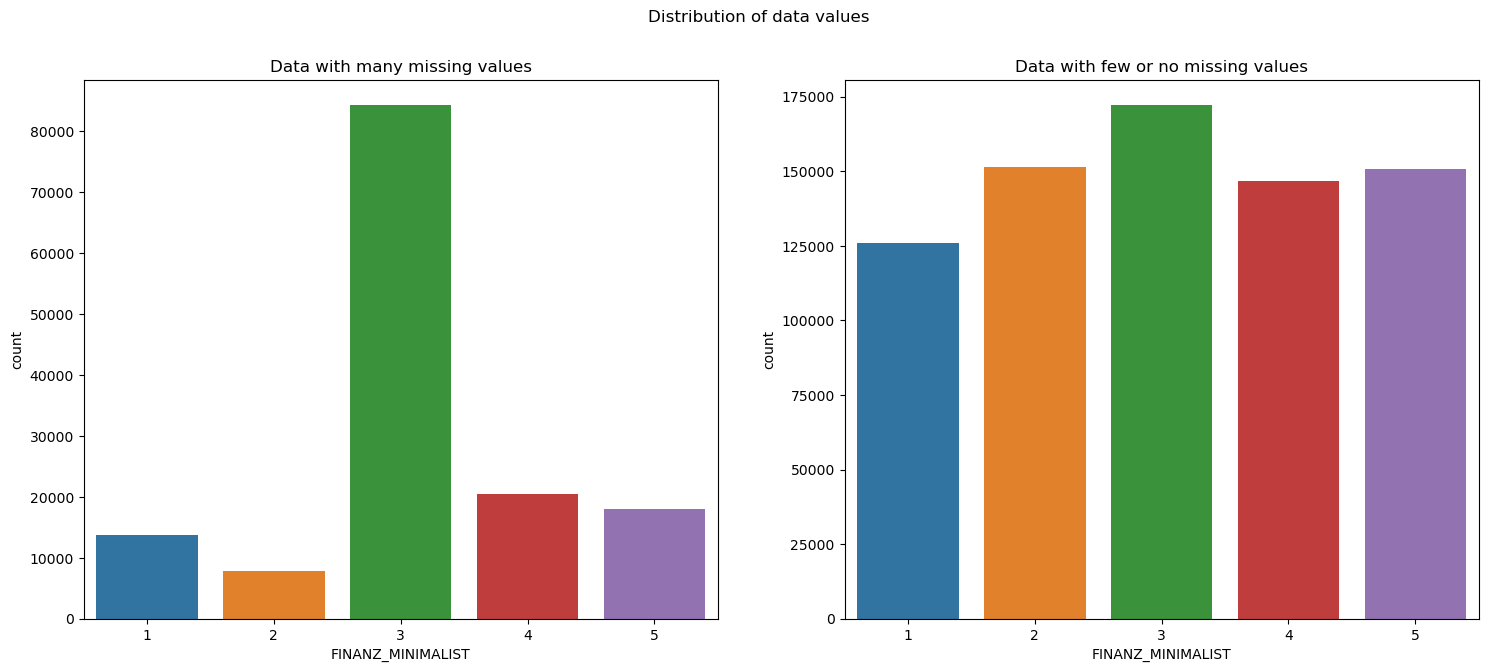

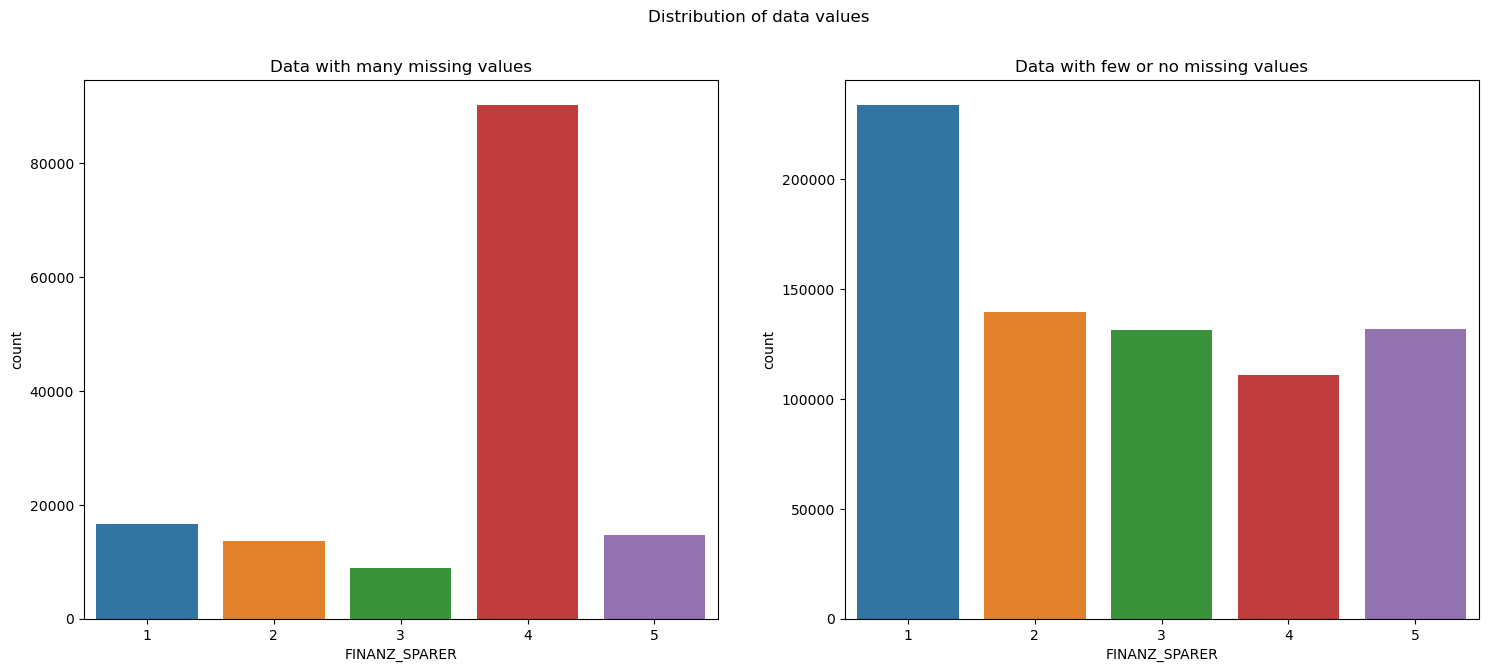

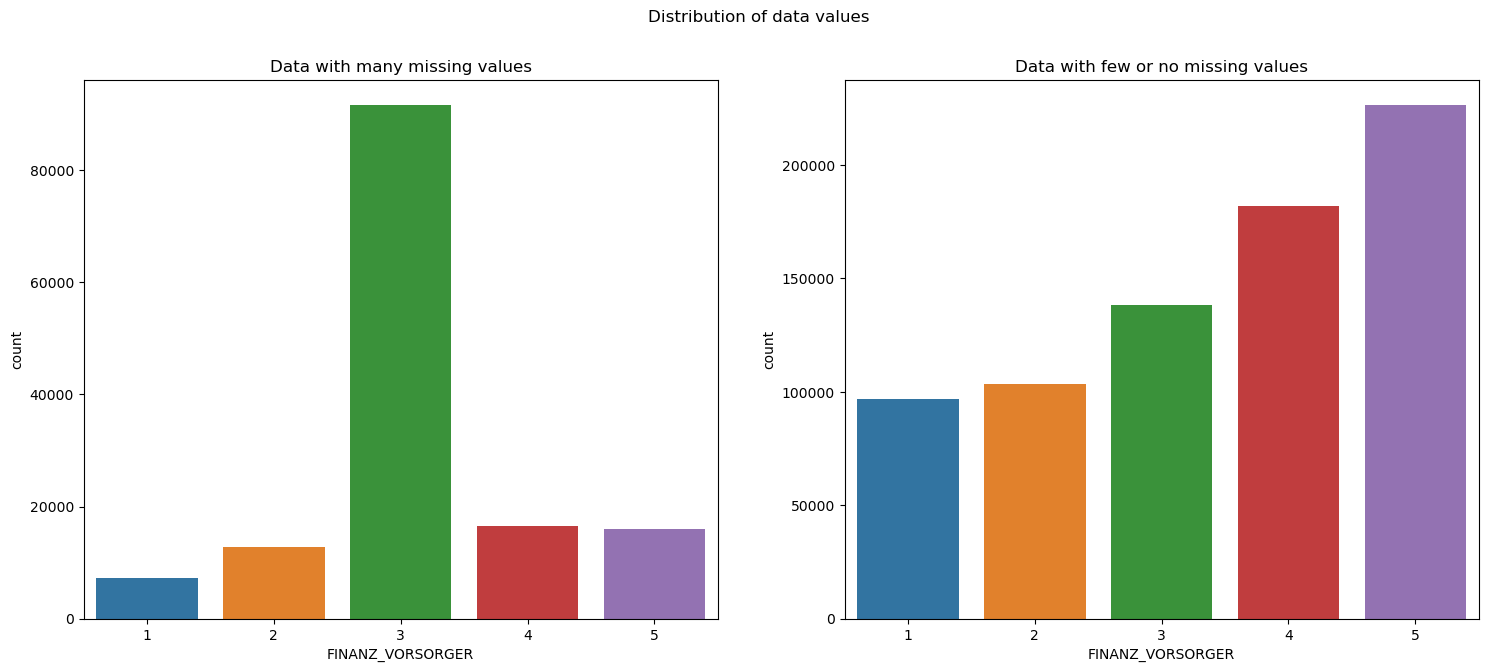

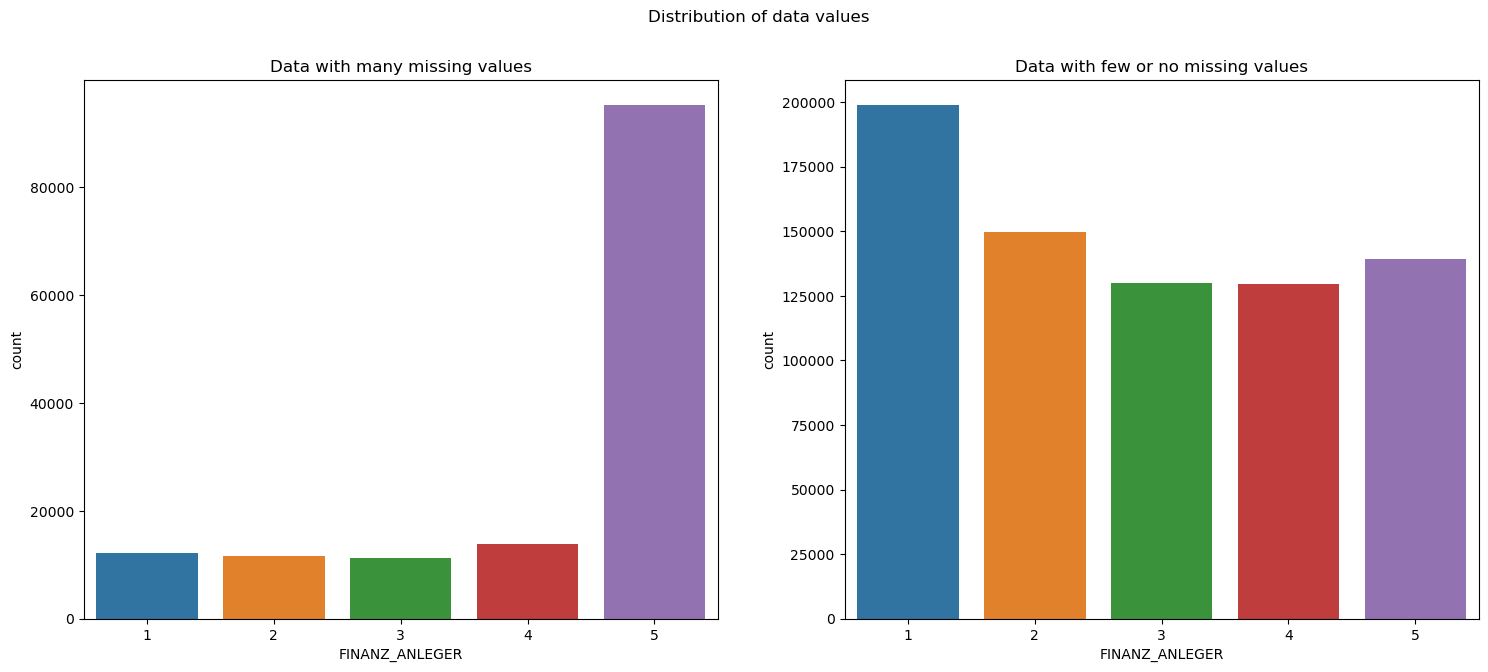

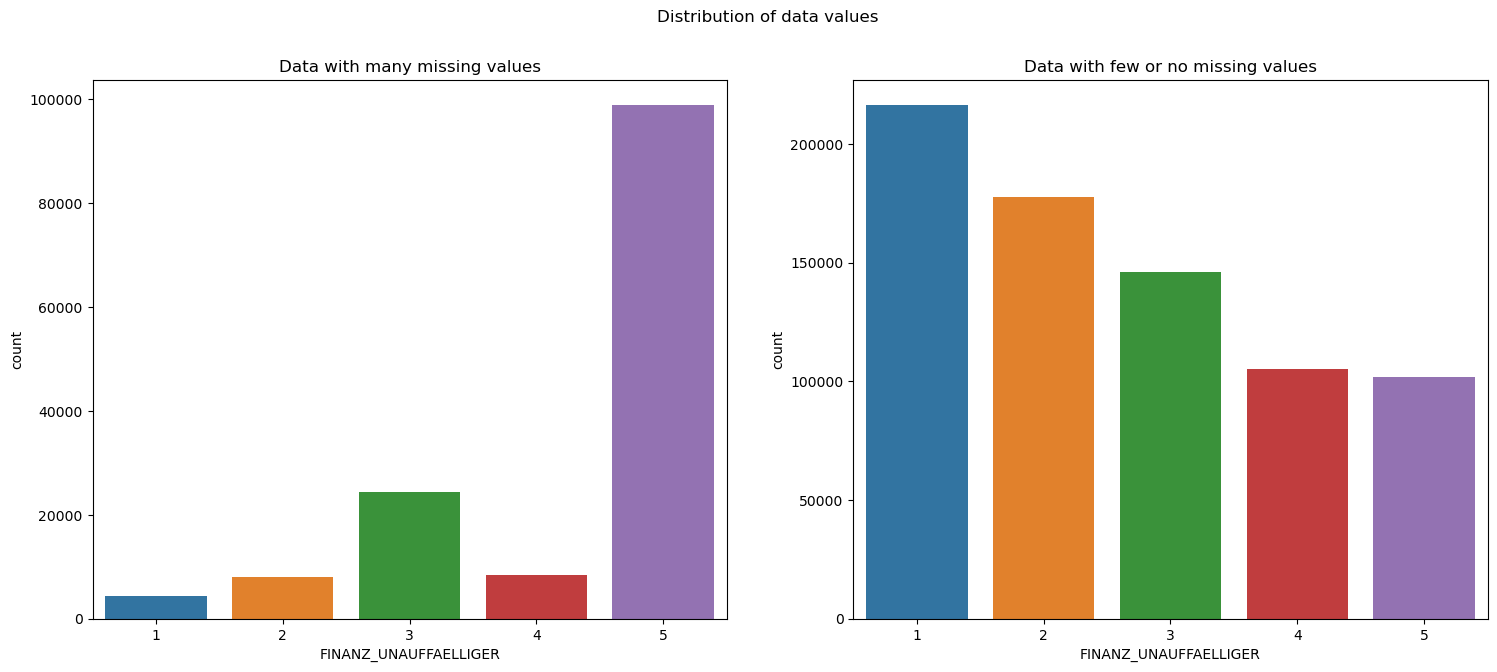

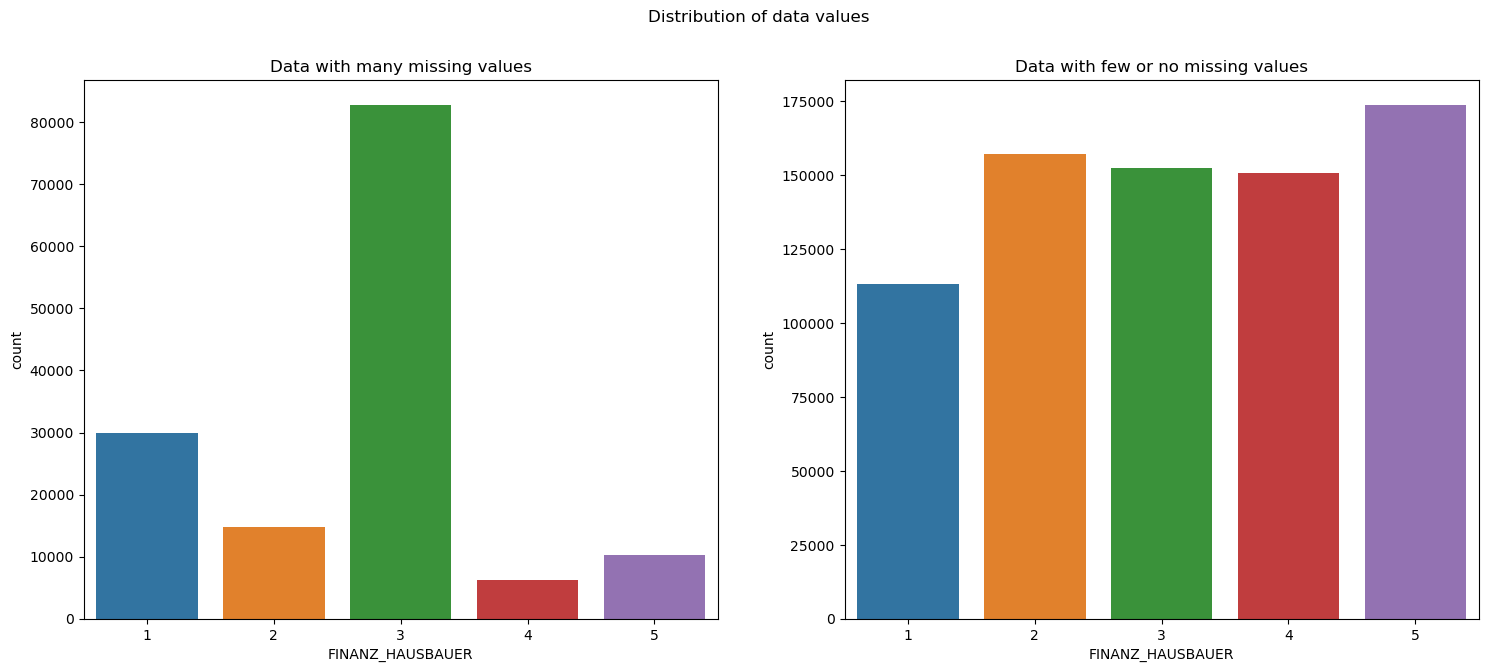

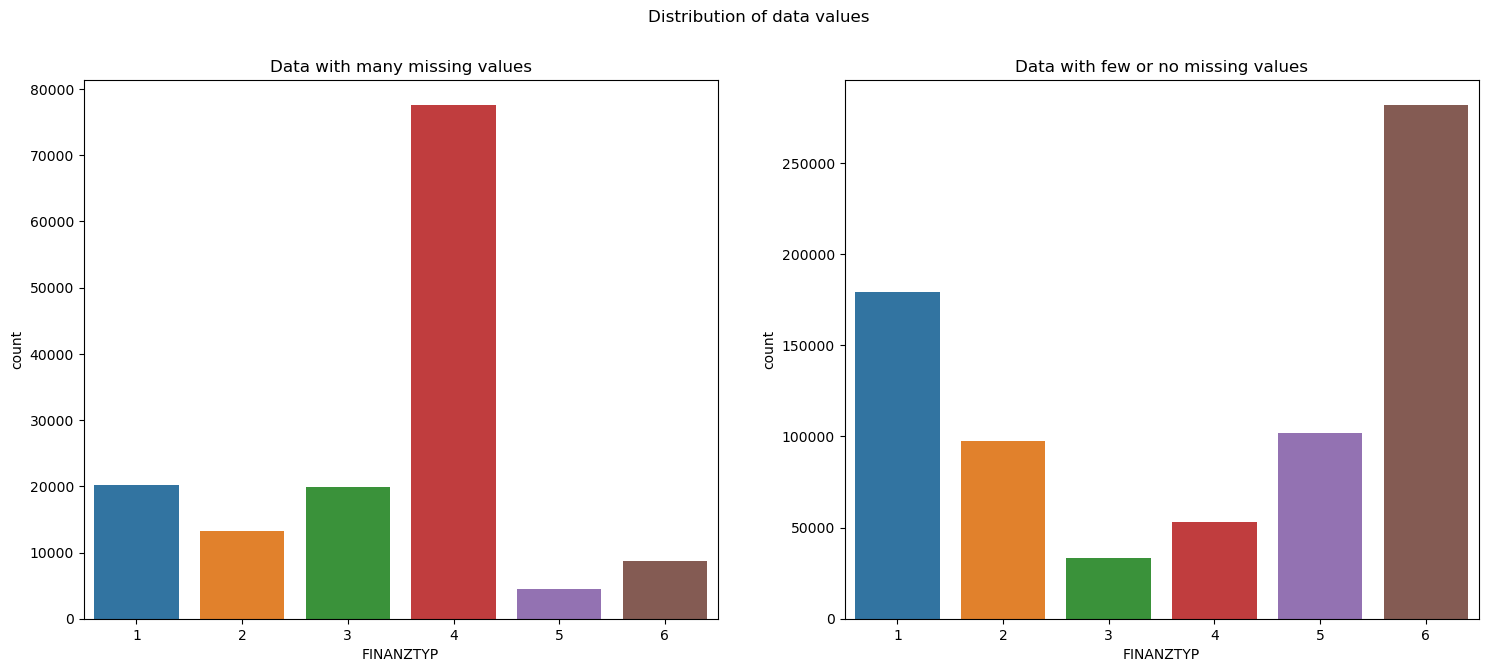

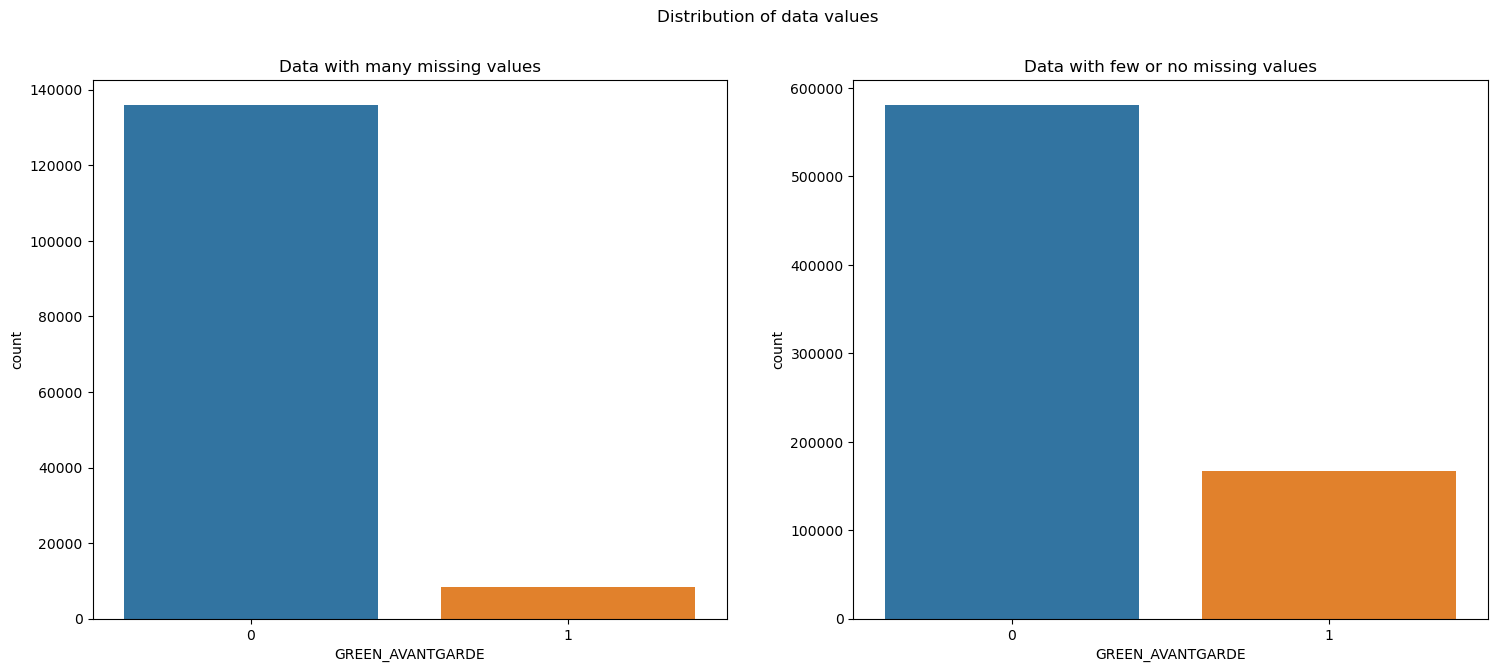

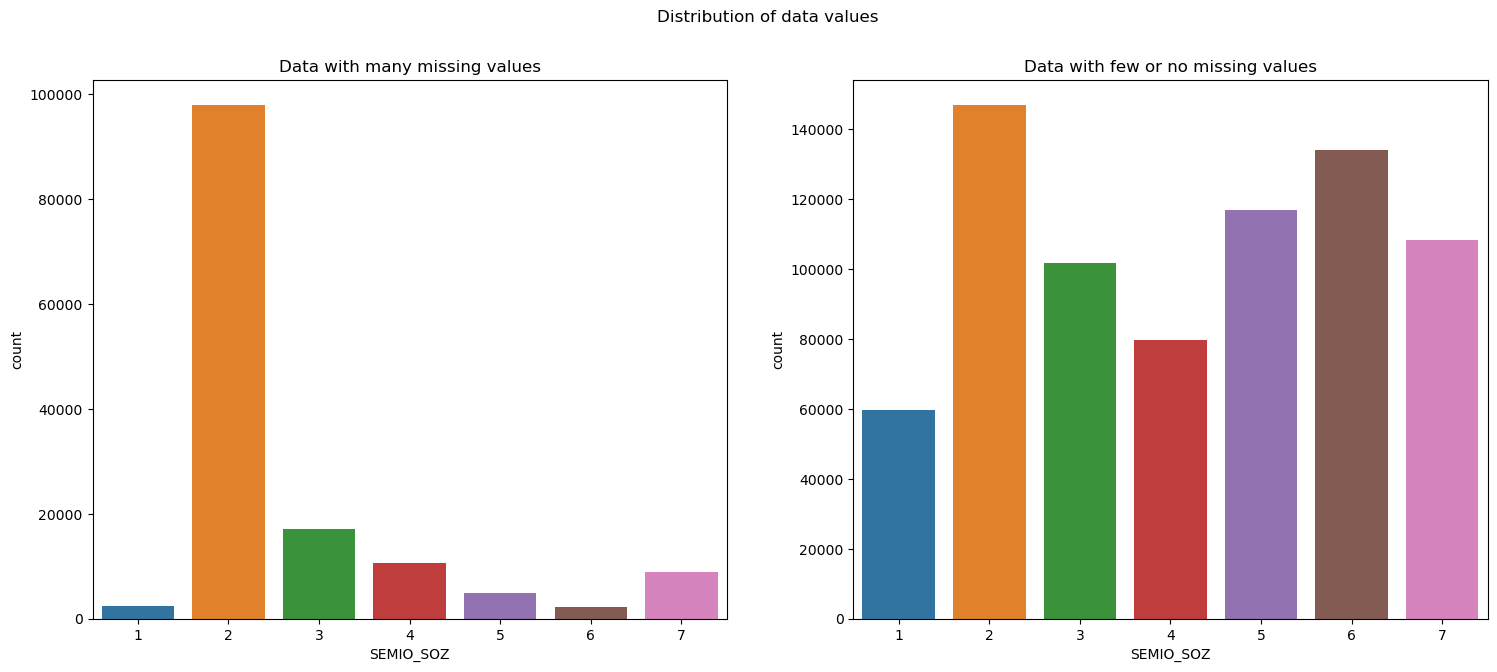

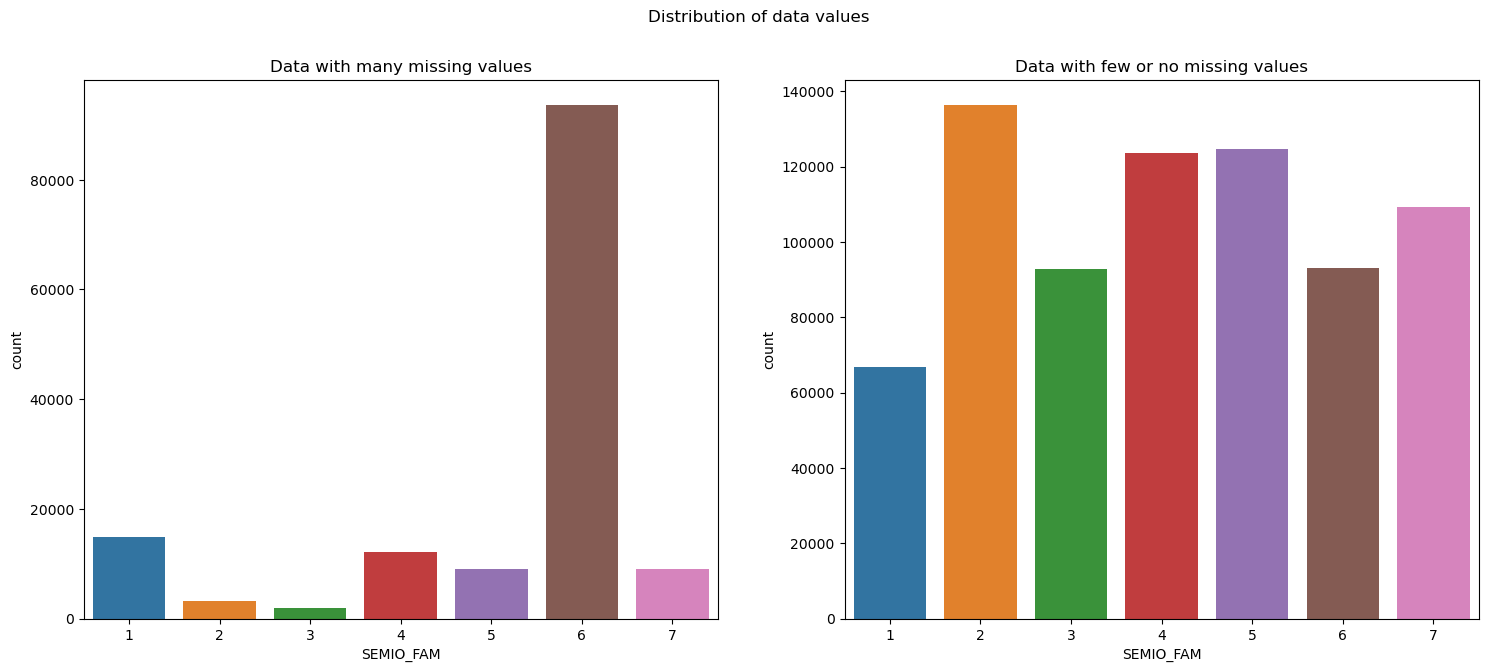

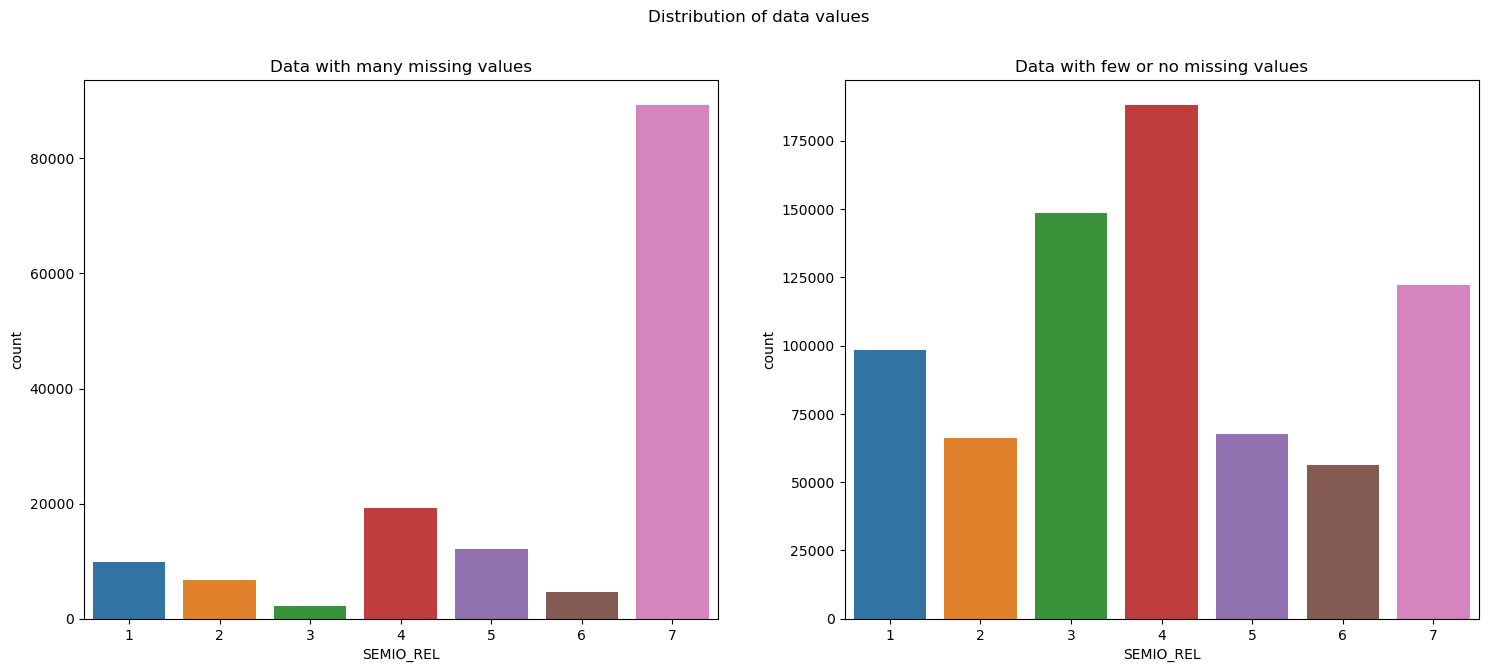

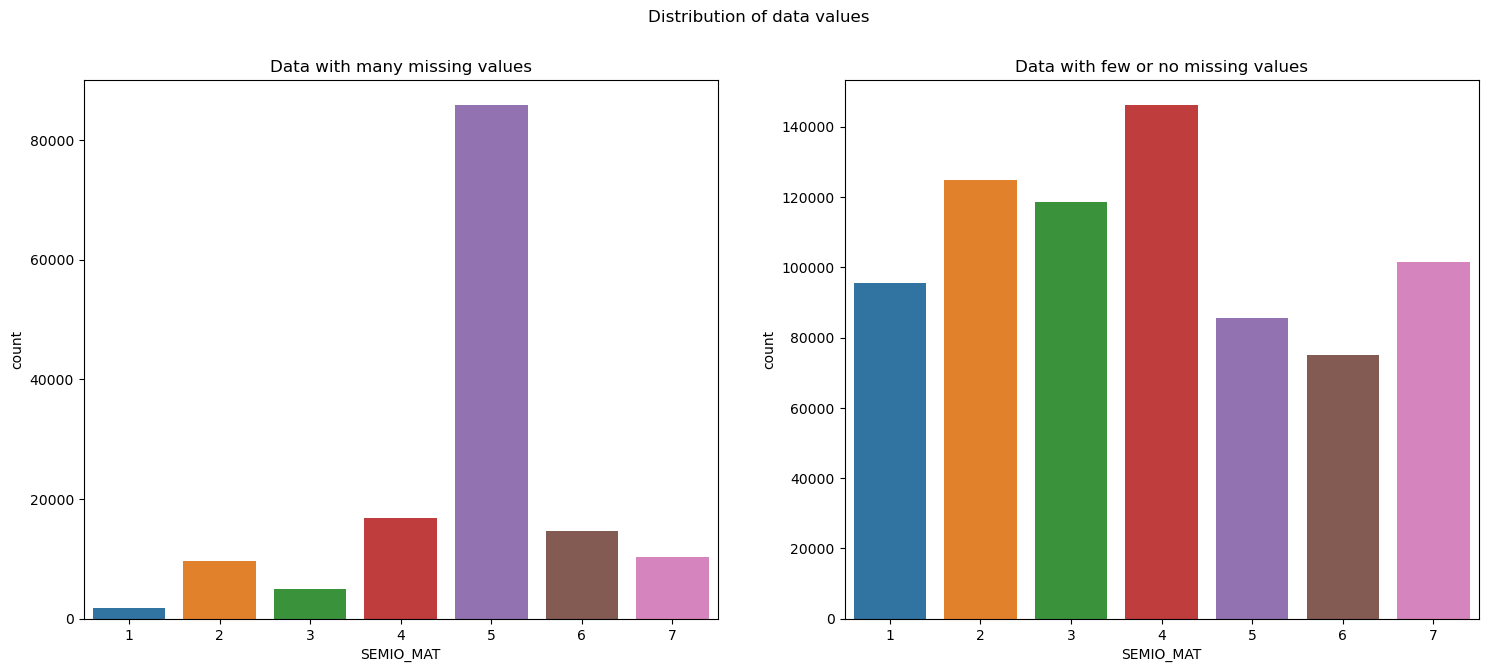

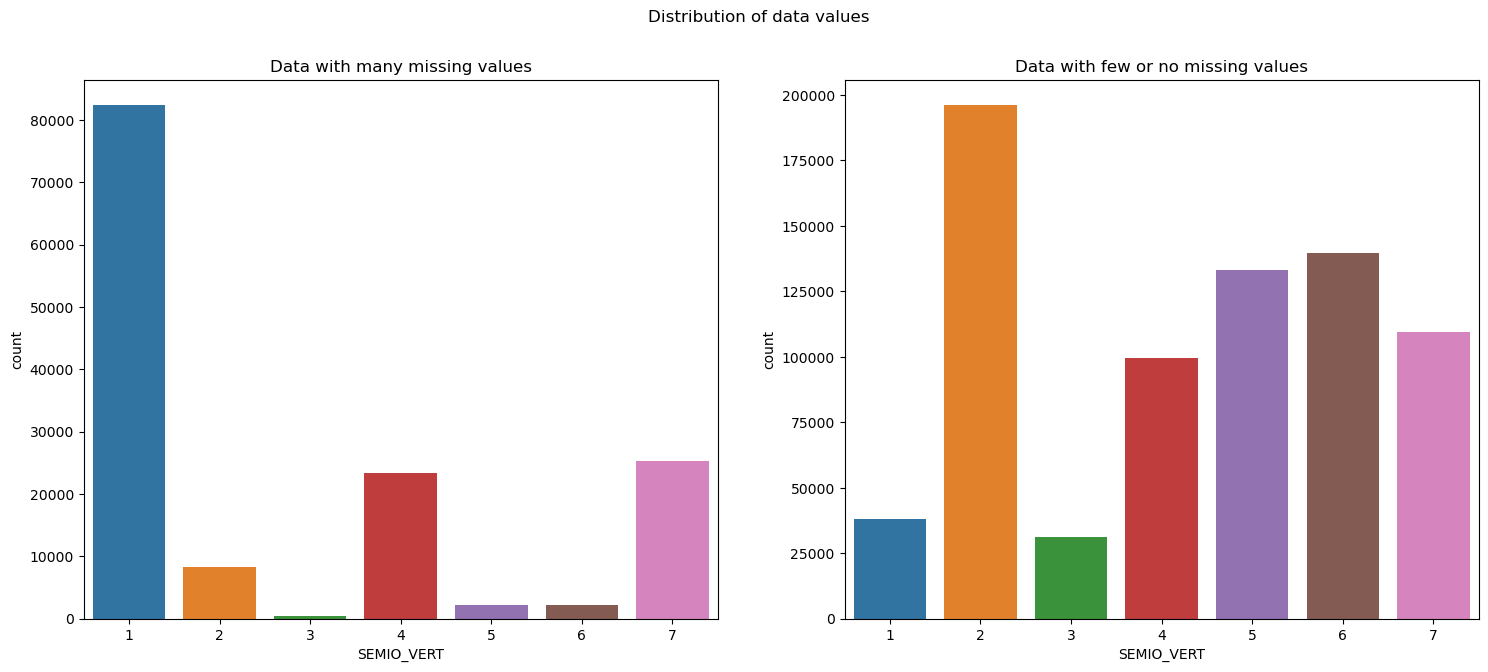

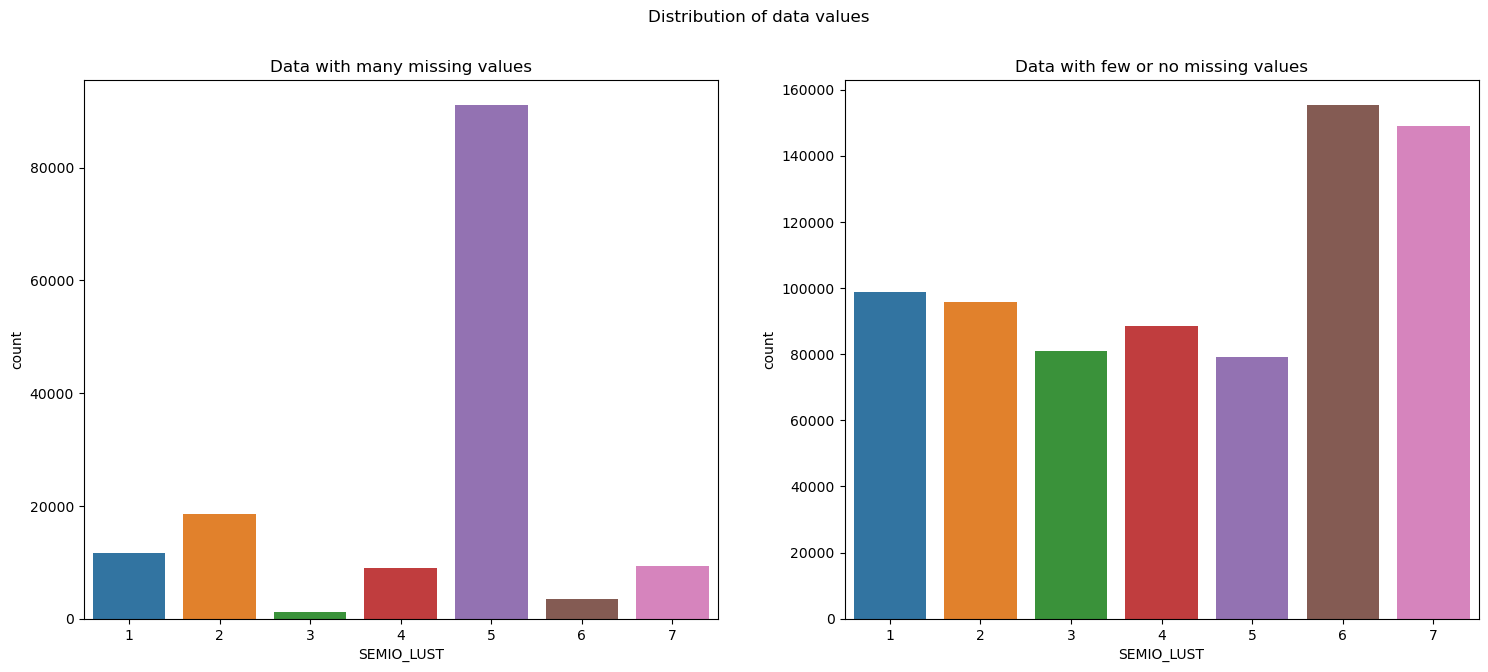

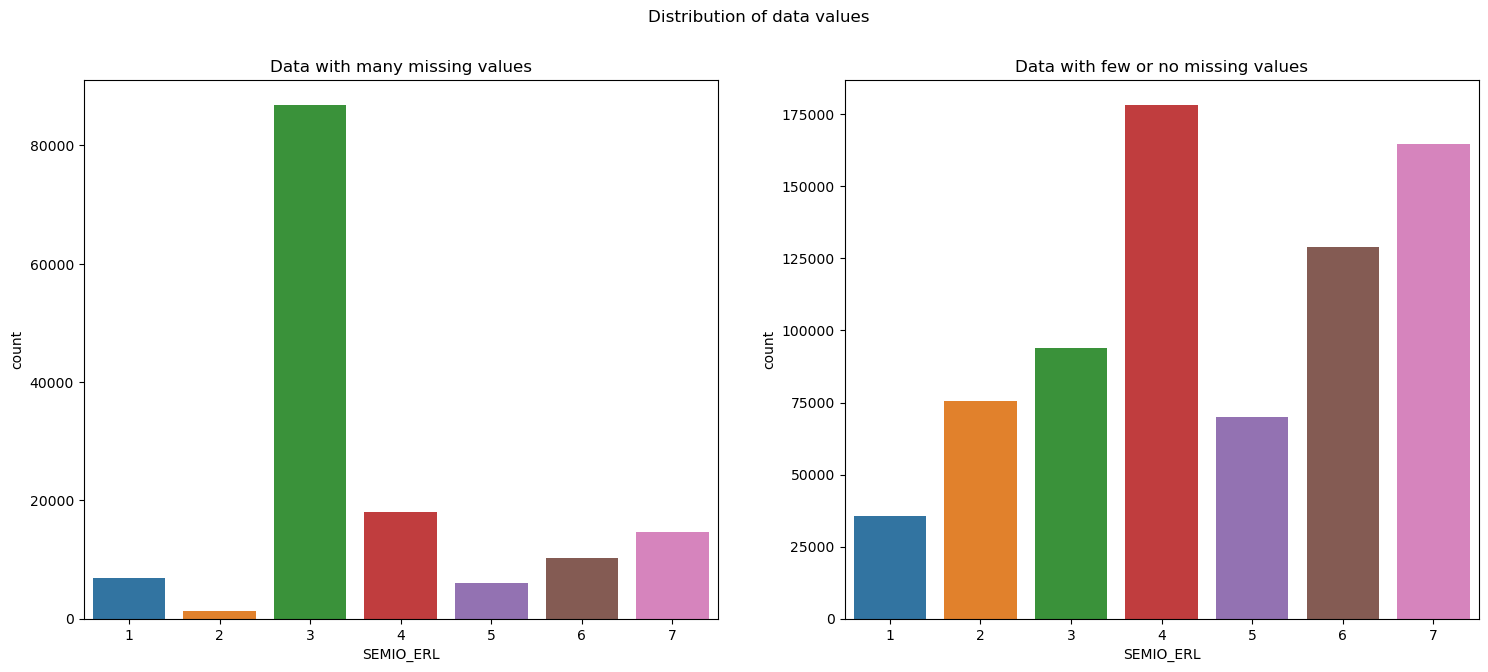

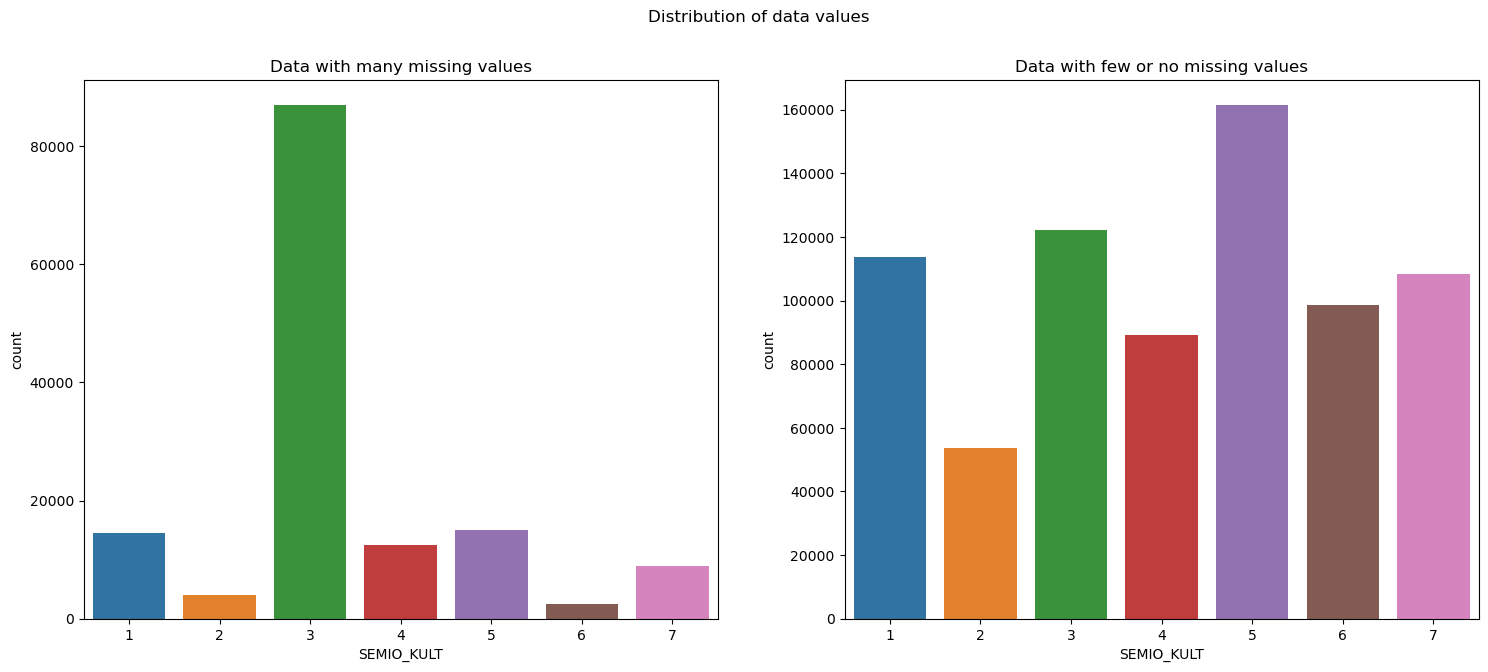

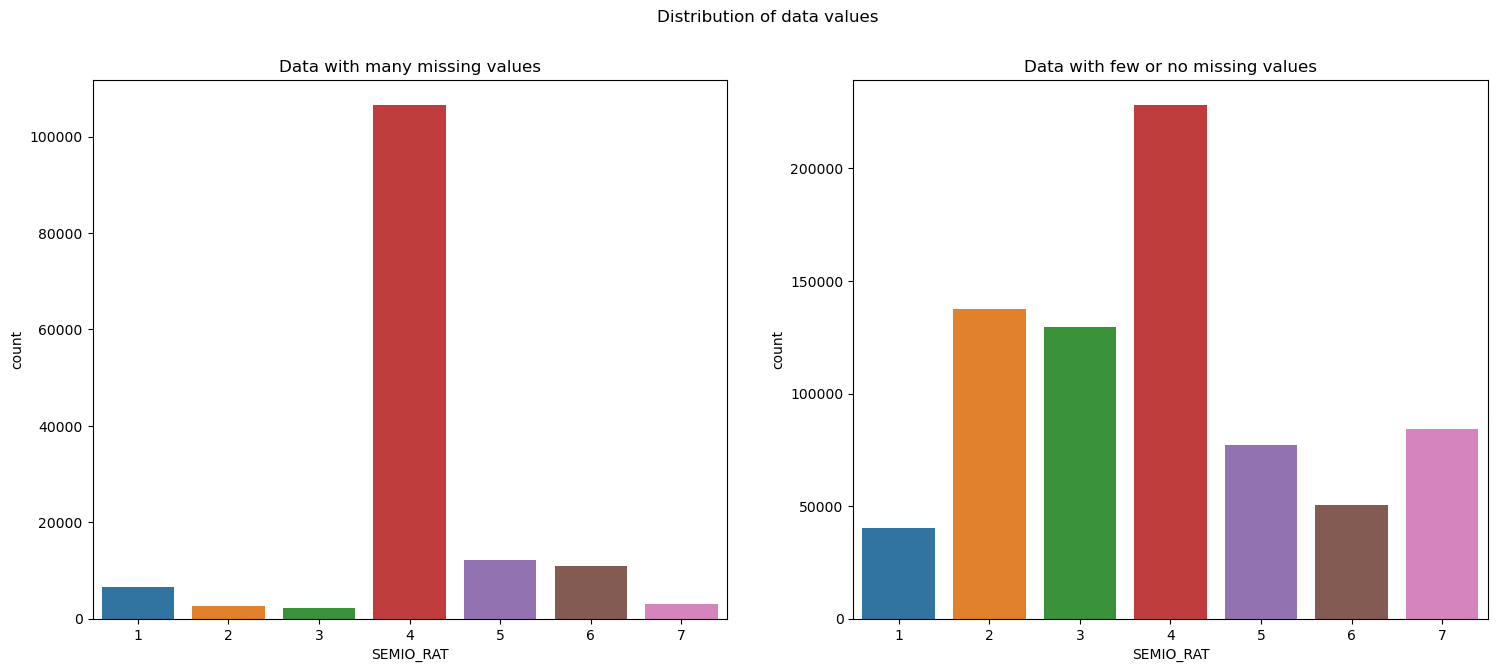

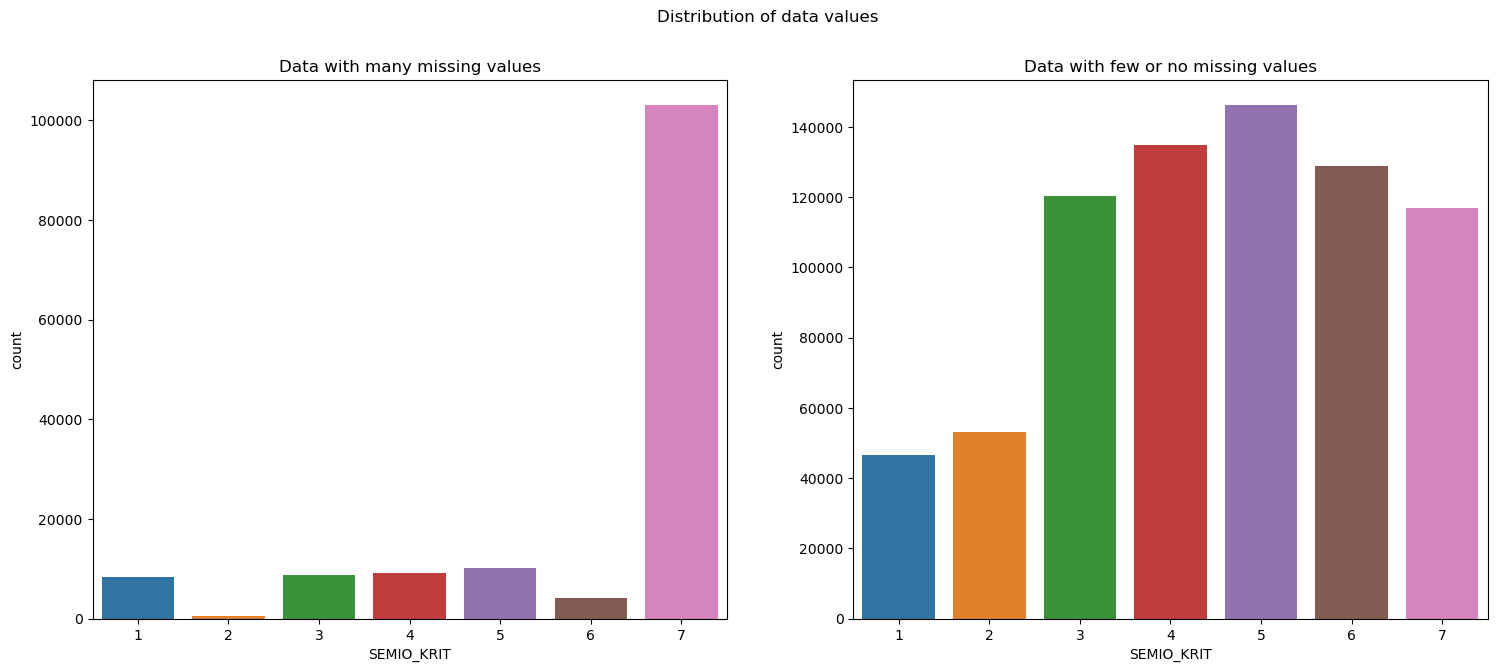

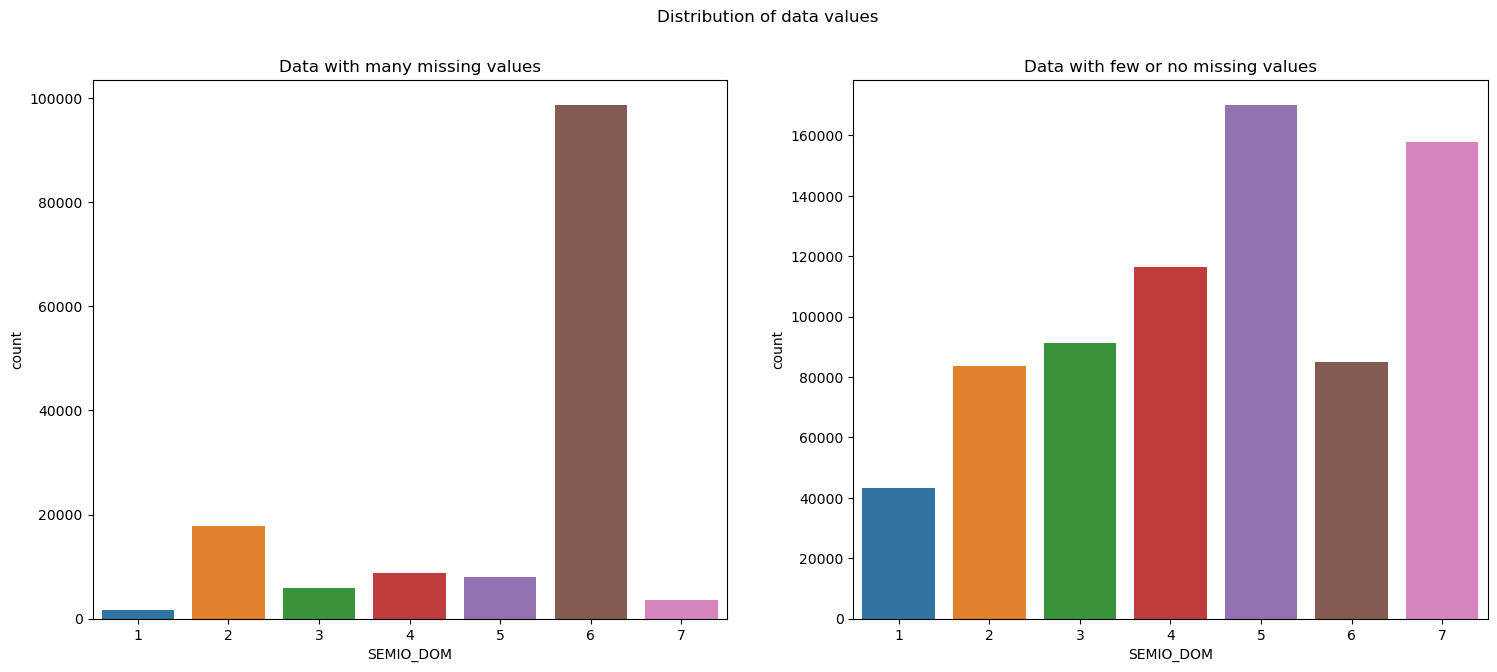

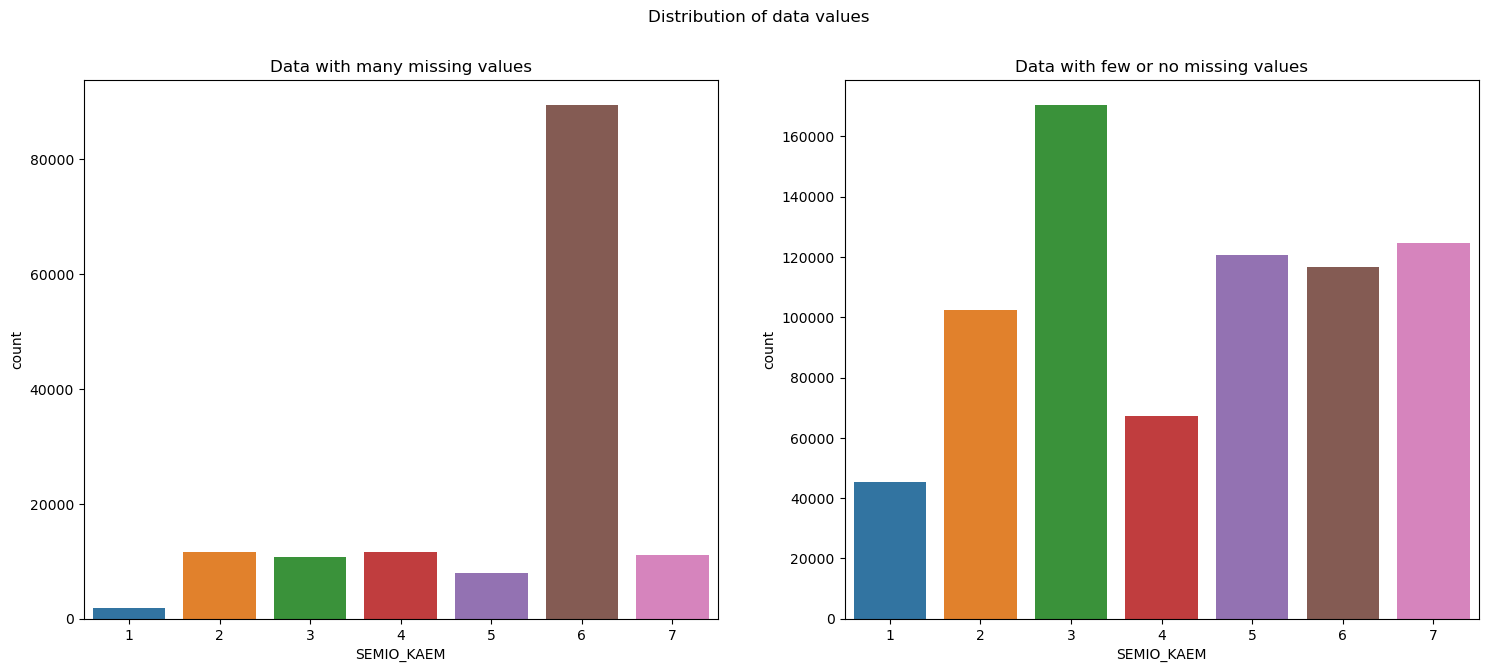

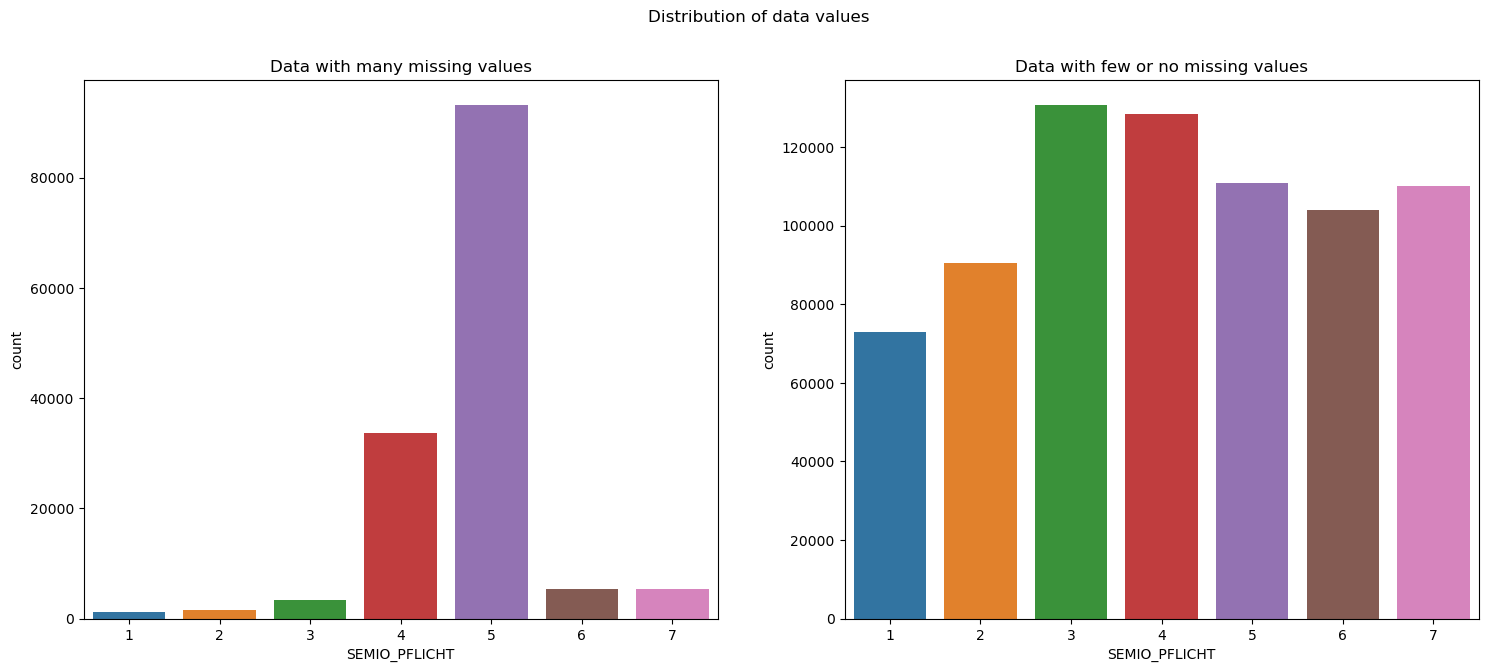

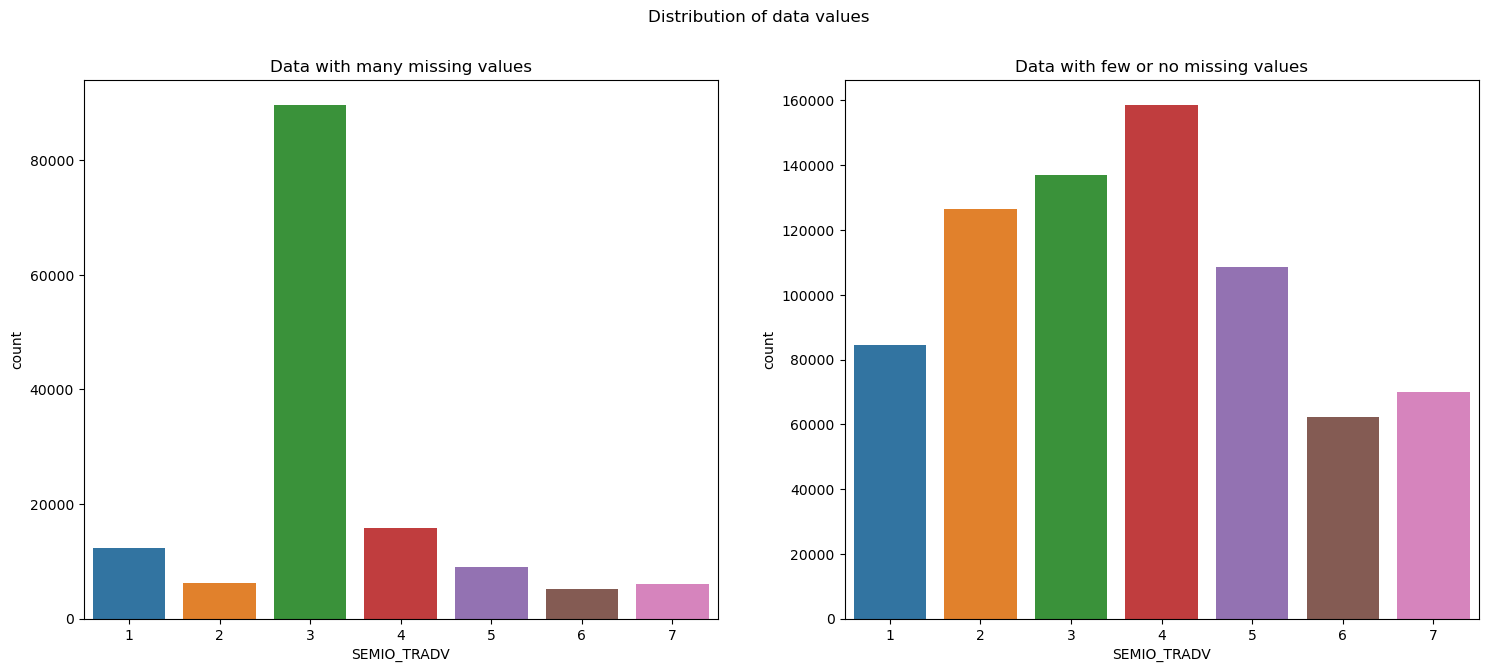

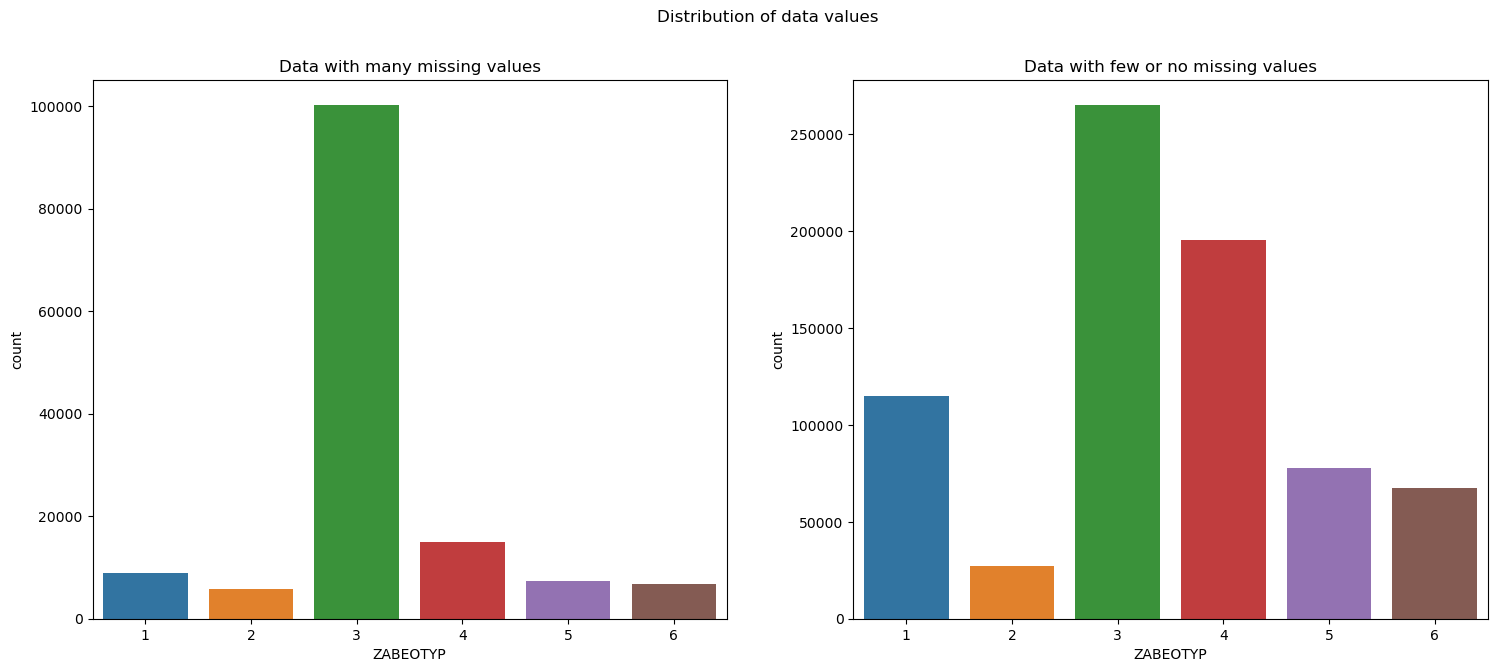

In [85]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
data_count = DataCountVisualizer()
columns_names = [col for col, value in zip(proportion_missing_values.index, proportion_missing_values) if value == 0]
for col in columns_names:
    data_count.count_plot(first_subset, second_subset, col, "Distribution of data values", "Data with many missing values",
             "Data with few or no missing values")

In [86]:
# impute the missing values in each column before encoding steps
imputer = MissingValuesImputer()
second_subset = imputer.general_data_imputer(second_subset, feat_info)

the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values in **ANREDE_KZ** feature only, but they are different in the rest of the features, so i decided not to drop any data points because they are special

### Step 1.2: Select and Re-Encode Features

- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In [87]:
# How many features are there of each data type?
feature__data_type_count = feat_info['type'].value_counts()
for data_type, count in zip(feature__data_type_count.index, feature__data_type_count):
    print("There are ", count , " Features in {} data type".format(data_type))

There are  49  Features in ordinal data type
There are  21  Features in categorical data type
There are  7  Features in numeric data type
There are  7  Features in mixed data type
There are  1  Features in interval data type


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, we would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, we can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, we need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables, or (to keep things straightforward) just drop them from the analysis.

In [88]:
# drop GEBAEUDETYP feature as we will not re-encode it because it has different values distribution and will obstacle
# the process of applying transformations on the customer data, as this feature in customer data has different value
# distribtuion and this will lead to conflicts
second_subset = second_subset.drop(columns = ['GEBAEUDETYP'])

In [89]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
categorical = feat_info[feat_info['type'] == 'categorical'].attribute
categorical = categorical.apply(lambda x: x if x in second_subset.columns else np.NAN).dropna()
categorical_levels = {'binary-level':[], 'binary-level-re-encoded':[],'multi-level-re-encoded':[]}
for categorical_col in categorical:
    unique_categories = pd.Series(second_subset[categorical_col].unique()).dropna().to_list()
    if len(unique_categories) == 2:
        if str(unique_categories[0]).isalpha() or str(unique_categories[1]).isalpha():
            categorical_levels['binary-level-re-encoded'].append(categorical_col)
        else:
            categorical_levels['binary-level'].append(categorical_col)
    elif len(unique_categories) > 2:
        categorical_levels['multi-level-re-encoded'].append(categorical_col)
for key, value in  categorical_levels.items():
    print('============================================')
    for val in value:
        print('The attribute ' , val , 'is' , key)
    print('============================================\n')

The attribute  ANREDE_KZ is binary-level
The attribute  SOHO_KZ is binary-level
The attribute  VERS_TYP is binary-level
The attribute  GREEN_AVANTGARDE is binary-level

The attribute  OST_WEST_KZ is binary-level-re-encoded

The attribute  CJT_GESAMTTYP is multi-level-re-encoded
The attribute  FINANZTYP is multi-level-re-encoded
The attribute  LP_FAMILIE_FEIN is multi-level-re-encoded
The attribute  LP_FAMILIE_GROB is multi-level-re-encoded
The attribute  LP_STATUS_FEIN is multi-level-re-encoded
The attribute  LP_STATUS_GROB is multi-level-re-encoded
The attribute  NATIONALITAET_KZ is multi-level-re-encoded
The attribute  SHOPPER_TYP is multi-level-re-encoded
The attribute  ZABEOTYP is multi-level-re-encoded
The attribute  CAMEO_DEUG_2015 is multi-level-re-encoded
The attribute  CAMEO_DEU_2015 is multi-level-re-encoded
The attribute  GFK_URLAUBERTYP is multi-level-re-encoded



In [90]:
# preprocessing for multi-level attributes to be able to convert them to multiple dummy variables
for categorical_col in categorical_levels['multi-level-re-encoded']:
    second_subset.loc[:, categorical_col] = second_subset[categorical_col].apply(lambda x: x if str(x).isalpha() else str(x))

In [91]:
# Re-encode categorical variable(s) to be kept in the analysis.
# re-encode binary-level attribute
second_subset[categorical_levels['binary-level-re-encoded'][0]] = second_subset[categorical_levels['binary-level-re-encoded'][0]].apply(lambda x: 0 if x == 'W' else 1)
# re-encode multi-level attribute
multiple_dummy_attributes = pd.get_dummies(second_subset[categorical_levels['multi-level-re-encoded']])
second_subset = pd.concat([second_subset, multiple_dummy_attributes],axis=1)

re-encoded the binary variable that has non numerical values, and replaced its non numerical representation of categorical levels with two number representation for each categorical level and the two numbers are **0** and **1**, the multi-level attributes choose to drop one of them which is **GEBAEUDETYP** because in general demographics it has different values distribution than in customer demographics which will lead to conflicts and for the others multi-level attributes, instead re-encoded them, and replaced these attributes with the new multiple dummy attributes

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, I should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables.

In [92]:
encoder = DataEncoder()
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
# Create first variable movement wiht two bianry values: 0 for avantgarde and 1 for mainstream
second_subset['movement'] = second_subset['PRAEGENDE_JUGENDJAHRE'].apply(encoder.movement_encoding)
# Create second variable decade with multi-values: 0 for 40s and 1 for 50s and 2 for 60s 
# and 3 for 70s and 4 for 80s and 5 for 90s
second_subset['decade'] = second_subset['PRAEGENDE_JUGENDJAHRE'].apply(encoder.decade_encoding)

In [93]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
second_subset["CAMEO_INTL_2015"]= second_subset["CAMEO_INTL_2015"].astype(float)
# Create first variable wealth with multi-values: 0 for (11,12,13,14,15) and 1 for (21,22,23,24,25) and 2 for (31,32,33,34,35)
# and 3 for (41,42,43,44,45) and 4 for (51,52,53,54,55)
second_subset['wealth'] = second_subset['CAMEO_INTL_2015'].apply(encoder.wealth_encoding)
# create second variable life_stage with multi-values: 0 for (11,21,31,41,51) and 1 for (12,22,32,42,52)
# and 2 for (13,23,33,43,53) and 3 for (14,24,34,44,54) and 4 for (15,25,35,45,55)
second_subset['life_stage'] = second_subset['CAMEO_INTL_2015'].apply(encoder.life_stage_encoding)

Created two variables **decade** and **movement** from **PRAEGENDE_JUGENDJAHRE** then deleted the original column and kept the new two variables, then make new two variables **life_stage** and **wealth** from **CAMEO_INTL_2015** and removed the original column and kept the new two variables

decided to keep the following mixed features without any feature engineering preprocessing because they were will distinguished in their original encoding

- **WOHNLAGE**
- **KBA05_BAUMAX**
- **PLZ8_BAUMAX**

decided also to remove the following features because there is not enough informations to help me distinguish between different dimensions represented in each feature

- **LP_LEBENSPHASE_FEIN**
- **LP_LEBENSPHASE_GROB**

#### Step 1.2.3: Complete Feature Selection

The dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

In [94]:
# Delete all useless columns
second_subset = second_subset.drop(["PRAEGENDE_JUGENDJAHRE", "CAMEO_INTL_2015"], axis= 1)
second_subset = second_subset.drop(categorical_levels['multi-level-re-encoded'],axis='columns')

In [95]:
second_subset = second_subset.drop(columns=['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB'])
second_subset = second_subset.drop(columns=["NAN count"])